<a href="https://colab.research.google.com/github/akshaypt7/covid_prediction_from_xray/blob/main/Covidnotcovid_Scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import keras as keras
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D , MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

In [ ]:
# Downloading raw data required for training 

# !gdown https://drive.google.com/uc?id=11EHCY23wGtIRHsfy-miRmesfkwpOlsBH

In [8]:
# Unzip the the file on the local instance

!unzip -qq /content/drive/MyDrive/Univ.ai/kaggle_transfer_learning_covid.zip

In [5]:
# Import the necessary libraries
import os
import cv2
import pathlib

#### YOUR CODE HERE ####


In [6]:
data_gen = ImageDataGenerator(rotation_range =30,width_shift_range=0.2,height_shift_range=0.2,rescale=1/255,
                              shear_range=0.2,horizontal_flip =True,fill_mode='nearest' , validation_split=0.2)

In [9]:
train_data_gen = data_gen.flow_from_directory('/content/kaggle_transfer_learning_covid/train',
                                              target_size=(150,150),
                                              batch_size=16,
                                              class_mode='categorical',
                                              subset='training')
valid_data_gen = data_gen.flow_from_directory('/content/kaggle_transfer_learning_covid/train',
                                              target_size=(150,150),
                                              batch_size=16,
                                              class_mode='categorical',
                                              subset='validation')

Found 168 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


#### Visualize

In [37]:


class_covid = {j:i for i,j in train_data_gen.class_indices.items()}
class_covid

{0: 'covid', 1: 'normal', 2: 'pneumonia'}

In [38]:
np.argmax([0,0,1])

2

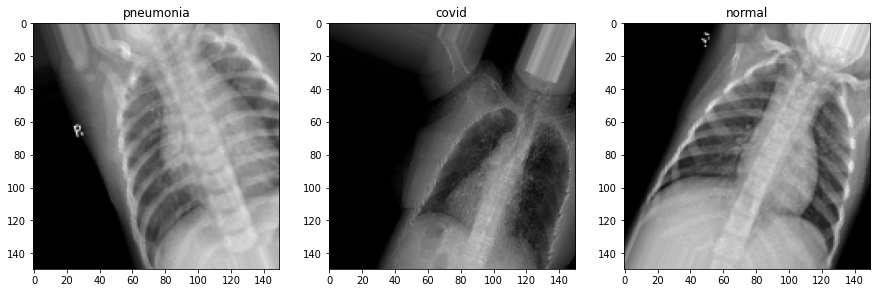

In [43]:
images = train_data_gen.next()
from matplotlib.pyplot import figure



fig,ax = plt.subplots(1,3,figsize=(15,15))

for i in range(3):
  ax[i].imshow(images[0][i]);
  ax[i].set_title(f'{class_covid[np.argmax(images[1][i])]}')






In [ ]:
base_model = Sequential()
base_model.add(Conv2D(32,3,padding='same', input_shape=(150,150,3), activation='relu'))
base_model.add(Conv2D(64,3,activation='relu'))
base_model.add(MaxPooling2D())
base_model.add(Conv2D(32,3,activation='relu'))

base_model.add(Flatten())
base_model.add(Dropout(0.5))
base_model.add(Dense(50,activation='relu'))
base_model.add(Dense(3,activation='softmax'))

In [ ]:
base_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
base_model.fit(train_data_gen,validation_data = valid_data_gen, steps_per_epoch =168//16, validation_steps=42//16 , epochs=10)

Epoch 1/10
10/10 [==============================] - 8s 821ms/step - loss: 1.0256 - accuracy: 0.5500 - val_loss: 0.9868 - val_accuracy: 0.6875
Epoch 2/10
10/10 [==============================] - 8s 815ms/step - loss: 1.0116 - accuracy: 0.5658 - val_loss: 0.8741 - val_accuracy: 0.6875
Epoch 3/10
10/10 [==============================] - 8s 809ms/step - loss: 0.9447 - accuracy: 0.5526 - val_loss: 0.8927 - val_accuracy: 0.6875
Epoch 4/10
10/10 [==============================] - 7s 751ms/step - loss: 0.9355 - accuracy: 0.5813 - val_loss: 0.8614 - val_accuracy: 0.5938
Epoch 5/10
10/10 [==============================] - 7s 706ms/step - loss: 0.9172 - accuracy: 0.6316 - val_loss: 0.7603 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 8s 785ms/step - loss: 0.9798 - accuracy: 0.6316 - val_loss: 0.9188 - val_accuracy: 0.6875
Epoch 7/10
10/10 [==============================] - 8s 820ms/step - loss: 0.8623 - accuracy: 0.6645 - val_loss: 0.8405 - val_accuracy: 0.8125
Epoch 

In [ ]:
base_model.fit(train_data_gen,validation_data = valid_data_gen, epochs=2)

Epoch 1/2
11/11 [==============================] - 8s 773ms/step - loss: 1.0294 - accuracy: 0.5060 - val_loss: 0.9562 - val_accuracy: 0.5714
Epoch 2/2
11/11 [==============================] - 7s 666ms/step - loss: 1.0064 - accuracy: 0.5655 - val_loss: 1.0157 - val_accuracy: 0.6429


#### Transfer Learning

In [ ]:
# Get your train and validation data

# Remember to use appropriate target size and directory path defined above

# Train data with directory train_dir
#### YOUR CODE HERE ####


# Validation data with directory train_dir
#### YOUR CODE HERE ####


In [ ]:
# Print any 3 images of the train data along with the classes

#### YOUR CODE HERE ####

In [ ]:
# Load a SOTA model with trained weights

#### YOUR CODE HERE ####


In [ ]:
# Alter the FFNN to add on top of the SOTA

#### YOUR CODE HERE ####


In [ ]:
# Setup and summarize the model

#### YOUR CODE HERE ####


In [ ]:
# Compile the model with appropriate loss, optimizer and metric

#### YOUR CODE HERE ####


In [ ]:
# Fit the model

#### YOUR CODE HERE ####


In [ ]:
# Predict the images for the validation data

#### YOUR CODE HERE ####
